In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Load Librarys And Model**

In [2]:
import keras

In [3]:
# load vgg model
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# summarize the model
model.summary()

553467096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

### **Extracting only convolution layers and their weights**

In [4]:
# summarize filters in each convolutional layer
#from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
#model = VGG16()
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' in layer.name:
	# get filter weights
		filters, biases = layer.get_weights()
		print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [5]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights() # Here we can give the layer no to visualize

In [6]:
print(filters.shape)

(3, 3, 3, 64)


### **Normalize filter values to 0-1 so we can visualize them**

In [7]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
filters

array([[[[0.8601116 , 0.6161919 , 0.55114007, ..., 0.4212452 ,
          0.4828852 , 0.5304859 ],
         [0.9545779 , 0.5408773 , 0.6017826 , ..., 0.4582953 ,
          0.4846108 , 0.5538601 ],
         [0.89960235, 0.3896376 , 0.5539096 , ..., 0.42523453,
          0.4852669 , 0.5518304 ]],

        [[0.81635594, 0.65118545, 0.52590066, ..., 0.4087713 ,
          0.340725  , 0.47531587],
         [0.8683965 , 0.5615535 , 0.5647105 , ..., 0.44733417,
          0.2931476 , 0.46953422],
         [0.8437643 , 0.39145148, 0.5206881 , ..., 0.42896524,
          0.30857468, 0.4940327 ]],

        [[0.47662497, 0.63058364, 0.43417358, ..., 0.4150598 ,
          0.22949417, 0.28977698],
         [0.4609779 , 0.5572666 , 0.4450579 , ..., 0.4508793 ,
          0.12949093, 0.22478487],
         [0.4736674 , 0.40397066, 0.41671643, ..., 0.42346177,
          0.16341406, 0.27143562]]],


       [[[0.7392438 , 0.6404719 , 0.6507926 , ..., 0.43525034,
          0.810127  , 0.7901605 ],
         [0.

### **Plot first few filters**

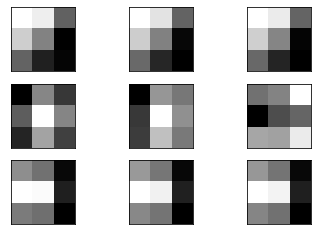

In [8]:
import matplotlib.pyplot as pyplot
n_filters, ix = 3,1   #  if ix=2,1 next filters 
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
   	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters,3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')# Shows gray representation
		# pyplot.imshow(f[:, :, j], cmap='viridis') # Shows colorful representation
		# pyplot.imshow(f[:, :, j], cmap='hot') # Shows colorful representation
		ix += 1
# show the figure
pyplot.show()

In [9]:
print(f)   

[[[0.55114007 0.6017826  0.5539096 ]
  [0.52590066 0.5647105  0.5206881 ]
  [0.43417358 0.4450579  0.41671643]]

 [[0.6507926  0.7126644  0.65472686]
  [0.6467724  0.69669527 0.6426892 ]
  [0.45429817 0.47241867 0.43874004]]

 [[0.53464687 0.58391243 0.5367759 ]
  [0.52460825 0.5625993  0.51834106]
  [0.42663756 0.43700036 0.40804785]]]


### **Summarize feature map shapes**

In [10]:
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' in layer.name:
	# summarize output shape
		print(i, layer.name, layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


### **Redefine model to output right after the second hidden layer**

In [14]:
from keras.applications.vgg16 import preprocess_input
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot 
from numpy import expand_dims
import cv2
model_layer2 = Model(inputs=model.inputs, outputs=model.layers[2].output)

In [15]:
model_layer2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


### **load the image with the required shape**

In [16]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/truck.jpg', target_size=(224, 224))

In [17]:
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

In [18]:
print(img.shape)

(1, 224, 224, 3)


In [19]:
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model_layer2.predict(img)

1/1 [==============================] - 1s 635ms/step


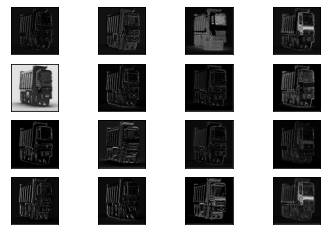

In [20]:
# plot all 64 maps in an 8x8 squares
square = 4
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

### **Redefine model at layer 13**

In [22]:
model_layer13 = Model(inputs=model.inputs, outputs=model.layers[13].output)
model_layer13.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [23]:
feature_maps13 = model_layer13.predict(img)

1/1 [==============================] - 1s 616ms/step


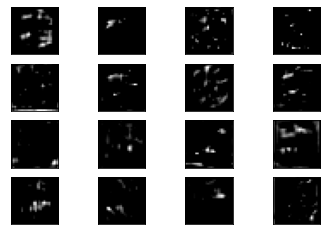

In [24]:
# plot all 64 maps in an 8x8 squares
square = 4
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps13[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()